### 버전 변경

In [1]:
!pip install keras==2.3.1
!pip install tensorflow==2.2.0

     |████████████████████████████████| 377 kB 29.9 MB/s 
     |████████████████████████████████| 50 kB 4.1 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires keras<2.9,>=2.8.0rc0, but you have keras 2.3.1 which is incompatible.
     |████████████████████████████████| 516.2 MB 4.0 kB/s 
     |████████████████████████████████| 2.9 MB 59.4 MB/s 
     |████████████████████████████████| 454 kB 67.8 MB/s 
     |████████████████████████████████| 3.0 MB 29.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimato

In [51]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [52]:
import keras
keras.__version__

'2.3.1'

# 작은 데이터셋 문제에서 딥러닝의 타당성

딥러닝은 데이터가 풍부할 때만 작동한다는 말을 이따금 듣는다. 부분적으로는 맞는 이야기이다. 딥러닝의 근본적인 특징은 훈련 데이터에서 특성 공학의 수작업 없이 흥미로운 특성을 찾을 수 있다. 이는 훈련 샘플이 많아야만 가능하다. 입력 샘플이 이미지와 같이 매우 고차원인 문제에서는 특히 그렇다.

- 많은 샘플이 의미하는 것은 상대적이다.


- 복잡한 문제를 푸는 컨브넷을 수십 개의 샘플만을 사용해서 훈련하는 것은 불가능하다.

- 하지만 모델이 작고 규제가 잘 되어 있으며 간단한 작업이라면 수백 개의 샘플로도 충분할 수 있다.

- 컨브넷은 지역적이고 평행 이동으로 변하지 않는 특성을 학습하기 때문에 지각에 관한 문제에서 매우 효율적으로 데이터를 사용한다.


- 매우 작은 이미지 데이터셋에서 어떤 종류의 특성 공학을 사용하지 않고 컨브넷을 처음부터 훈련해도 납득할 만한 결과를 만들 수 있다.


- 딥러닝 모델은 태생적으로 매우 다목적이다.


- 대규모 데이터셋에서 훈련시킨 이미지 분류 모델이나 스피치-투-텍스트 모델을 조금만 변경해서 완전히 다른 문제에 재사용할 수 있다.


- 특히 컴퓨터 비전에서는 (보통 ImageNet 데이터셋에서 훈련된) 사전 훈련된 모델들이 다운로드받을 수 있도록 많이 공개되어 있어서 매우 적은 데이터에서 강력한 비전 모델을 만드는데 사용할 수 있다.


# 데이터 로드
### 소규모 데이터 셋에서 컨브넷 훈련하기 

4000개의 강아지 고양이 사진으로 구성된 데이터셋을 train 2000, validation 1000, test 1000개로 분리하여 사용.

- 과대 적합 여부 확인
- 데이터 증식을 통한 네트워크의 성능 개선
- 사전 훈련된 네트워크을 활용

In [33]:
import os, shutil
base_dir = './drive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/cats_and_dogs_small'


# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')

validation_dir = os.path.join(base_dir, 'validation')

test_dir = os.path.join(base_dir, 'test')


# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')


# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')


# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')


# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')


# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')


In [5]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


# 네트워크 구성

Conv2D(relu 활성화 함수 사용)와 MaxPooling2D 층을 번갈아 쌓은 컨브넷을 만든다.


이전보다 이미지가 크고 복잡한 문제이기 때문에 네트워크를 좀 더 크게 만든다.


Conv2d + MaxPooling2D 단계를 하나 더 추가한다.


이렇게 하면 네트워크의 용량을 늘리고 Flatten 층의 크기가 너무 커지지 않도록 특성 맵의 크기를 줄일 수 있다.


150 × 150 크기(임의로 선택한 것)의 입력으로 시작해서 Flatten 층 이전에 7 × 7 크기의 특성 맵으로 줄어든다.


특성 맵의 깊이는 네트워크에서 점진적으로 증가하지만(32에서 128까지), 특성 맵의 크기는 감소한다(150 × 150 에서 7 × 7까지). 이는 거의 모든 컨브넷에서 볼 수 있는 전형적인 패턴이다.


이진 분류 문제이므로 네트워크는 하나의 유닛(크기가 1인 Dense 층)과 sigmoid 활성화 함수로 끝난다. 이 유닛은 한 클래스에 대한 확률을 인코딩할 것이다.

In [34]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [35]:
from keras import optimizers

model.compile(loss = 'binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

컴파일 단계에서 이전과 같이 RMSprop optimizer을 선택한다. 

네트워크의 마지막이 하나의 sigmoid 유닛이기 때문에 이진 크로스엔트로피(binary crossentropy)를 손실로 사용한다.

# 데이터 전처리

데이터는 네트워크에 주입되기 전에 부동 소수 타입의 텐서로 적절하게 전처리되어야 한다.

지금은 데이터가 JPEG 파일로 되어 있으므로 네트워크에 주입하려면 대략 다음 과정을 따른다.

1. 사진 파일을 읽습니다.
2. JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩한다.
3. 그 다음 부동 소수 타입의 텐서로 변환한다.
4. 픽셀 값(0에서 255 사이)의 스케일을 [0, 1] 사이로 조정한다(신경망은 작은 입력 값을 선호한).


좀 복잡하게 보일 수 있지만 다행히 케라스는 이런 단계를 자동으로 처리하는 유틸리티를 가지고 있다.

케라스는 keras.preprocessing.image에 이미지 처리를 위한 헬퍼 도구들을 가지고 있다.


특히 ImageDataGenerator 클래스는 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어주는 파이썬 제너레이터를 만들어 준다.

### flow_from_directory()
flow_from_directory() 는 인자로 설정해주는 directory의 바로 하위 디렉토리 이름을 레이블이라고 간주하고 그 레이블이라고 간주한 디렉토리 아래의 파일들을 해당 레이블의 이미지들이라고 알아서 추측하여 Numpy Array Iterator를 생성한다.<br><br>


flow_from_directory 파라미터
- target_size : 추후에 설계할 모델에 들어갈 인풋 이미지 사이즈 중 Width, Height를 입력
- batch_size : 이미지 데이터 원본 소스에서 한 번에 얼마만큼의 이미지 데이터를 가져올 것인지
- class_mode
  - 'categorical' : 'categorical_crossentropy' 처럼 멀티-레이블 클래스인데, 원-핫 인코딩된 형태
  - 'sparse' : 'sparse_categorical_crossentropy' 처럼 멀티-레이블 클래스인데, 레이블 인코딩된 형태
  - 'binary' : 'binary_crossentropy' 처럼 이진 분류 클래스로, 0 또는 1인 형태

In [36]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 변경
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요함
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


train_generator의 출력을 하나 확인해본다.

이 출력은 150 × 150 RGB 이미지의 배치(20, 150, 150, 3) 크기와 이진 레이블의 배치(20,) 크기이다.

각 배치에는 20개의 샘플(배치 크기)이 있다.

제너레이터는 이 배치를 무한정 만들어 낸다.

타깃 폴더에 있는 이미지를 끝없이 반복한다. 따라서 반복 루프안의 어디에선가 break 문을 사용해야 한다. 

In [37]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


# 모델 훈련

- fit_generator 메서드는 fit 메서드와 동일하되 데이터 제너레이터를 사용할 수 있다.


- 이 메서드는 첫 번째 매개변수로 입력과 타깃의 배치를 끝없이 반환하는 파이썬 제너레이터를 기대한다.


- 데이터가 끝없이 생성되기 때문에 케라스 모델에 하나의 epochs를 정의하기 위해 제너레이터로부터 얼마나 많은 샘플을 뽑을 것인지 알려 주어야 한다.
  - steps_per_epoch 매개변수에서 이를 설정한다.


- generator로부터 steps_per_epoch 개의 배치만큼 뽑은 다음, 즉 steps_per_epoch 횟수만큼 경사 하강법 단계를 실행한 다음에 훈련 프로세스는 다음 epochs로 넘어간다.


- 이 예제에서는 20개의 샘플이 하나의 배치이므로 2,000개의 샘플을 모두 처리할 때까지 100개의 배치를 뽑을 것이다.


- fit_generator를 사용할 때 fit 메서드와 마찬가지로 validation_data 매개변수를 전달할 수 있다.


- 이 매개변수에는 데이터 제너레이터도 가능하지만 넘파이 배열의 튜플도 가능하다.


- validation_data로 제너레이터를 전달하면 검증 데이터의 배치를 끝없이 반환한다.


- 따라서 검증 데이터 제너레이터에서 얼마나 많은 배치를 추출하여 평가할지 validation_steps 매개변수에 지정해야 한다.

In [38]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 13s 131ms/step - loss: 0.6908 - acc: 0.5395 - val_loss: 0.6706 - val_acc: 0.5910
Epoch 2/30
100/100 [==============================] - 12s 120ms/step - loss: 0.6629 - acc: 0.6080 - val_loss: 0.6060 - val_acc: 0.6540
Epoch 3/30
100/100 [==============================] - 12s 120ms/step - loss: 0.6211 - acc: 0.6720 - val_loss: 0.5308 - val_acc: 0.6690
Epoch 4/30
100/100 [==============================] - 12s 120ms/step - loss: 0.5682 - acc: 0.7120 - val_loss: 0.6259 - val_acc: 0.6450
Epoch 5/30
100/100 [==============================] - 12s 119ms/step - loss: 0.5386 - acc: 0.7300 - val_loss: 0.8219 - val_acc: 0.6910
Epoch 6/30
100/100 [==============================] - 12s 118ms/step - loss: 0.5105 - acc: 0.7540 - val_loss: 0.5569 - val_acc: 0.6990
Epoch 7/30
100/100 [==============================] - 12s 119ms/step - loss: 0.4905 - acc: 0.7650 - val_loss: 0.7119 - val_acc: 0.6820
Epoch 8/30
100/100 [==============================] - 1

훈련이 끝나면 항상 모델을 저장하는것이 좋은 습관이다.

In [39]:
model.save('./drive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/cats_and_dogs_small_1.h5')

In [28]:
from keras.models import load_model
model = load_model('./drive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/cats_and_dogs_small_1.h5')

# 시각화

훈련 데이터와 검증 데이터에 대한 모델의 손실과 정확도를 그래프로 나타낸다.

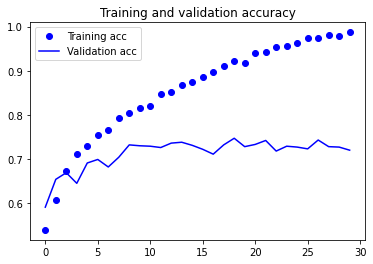

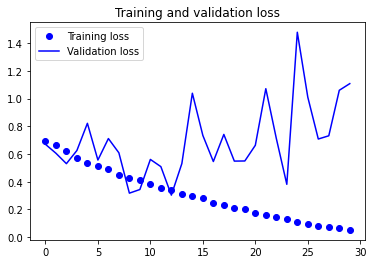

In [40]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

epochs  = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

이 그래프는 과대적합의 특성을 보인다.


훈련 정확도가 시간이 지남에 따라 선형적으로 증가해서 거의 100%에 도달한다.


반면 검증 정확도는 70-72%에서 멈추었다.


검증 손실은 다섯 번의 에포크만에 최솟값에 다다른 이후에 더 이상 진전되지 않았다.


반면 훈련 손실은 거의 0에 도달할 때까지 선형적으로 계속 감소한다.<br><br>


비교적 훈련 샘플의 수(2,000개)가 적기 때문에 과대적합이 가장 중요한 문제이다.


이전 예제에서 드롭아웃이나 가중치 감소(L2 규제)와 같은 과대적합을 감소시킬 수 있는 여러 가지 기법들을 배웠다.


지금 예제에서는 컴퓨터 비전에 특화되어 있어서 딥러닝으로 이미지를 다룰 때 매우 일반적으로 사용되는 새로운 방법인 데이터 증식을 시도해본다.

### 참조
Keras 및 Tensorflow를 사용한 이미지 데이터 증대방안

https://ichi.pro/ko/keras-mich-tensorflowleul-sayonghan-imiji-deiteo-jeungdae-tamsaeg-184813206747204

# 데이터 증식하여 모델 학습, 평가 및 시각화

과대적합은 학습할 샘플이 너무 적어 새로운 데이터에 일반화 시킬수 있는 모델을 훈련시킬 수 없기 때문에 발생한다.


무한히 많은 데이터가 주어지면 데이터 분포의 모든 가능한 측면을 모델이 학습할 수 있을 것이다. 


데이터 증식은 기존의 훈련 샘플로부터 더 많은 훈련 데이터를 생성하는 방법이다. 이 방법은 그럴듯한 이미지를 생성하도록 여러 가지 랜덤한 변환을 적용하여 샘플을 늘린다.


훈련 시에 모델이 정확히 같은 데이터를 두 번 만나지 않도록 하는 것이 목표이다. 모델이 데이터의 여러 측면을 학습하면 일반화에 도움이 될 것이다.

keras에서는 ImageDataGenerator가 읽은 이미지에 여러 종류의 랜덤 변환을 적용하도록 설정할 수 있다.

In [41]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

추가적인 매개변수
- rotation_range는 랜덤하게 사진을 회전시킬 각도 범위(0~180 사이의 값)


- width_shift_range와 height_shift_range는 사진을 수평과 수직으로 랜덤하게 평행 이동시킬 범위(전체 넓이와 높이에 대한 비율)


- shear_range는 랜덤하게 전단 변환을 적용할 각도 범위


- zoom_range는 랜덤하게 사진을 확대할 범위


- horizontal_flip은 랜덤하게 이미지를 수평으로 뒤집는다 수평 대칭을 가정할 수 있을 때 사용(예를 들어, 풍경/인물 사진)


- fill_mode는 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략이다.

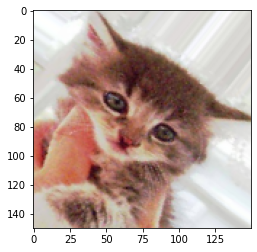

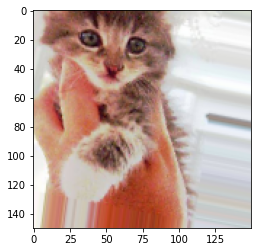

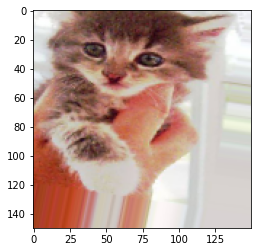

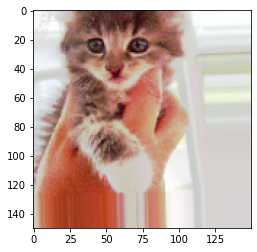

In [42]:
# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image
import matplotlib.pyplot as plt

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지 선택
img_path = fnames[3]

# 이미지를 읽고 크기를 변경
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성
# 무한 반복되기 때문에 어느 지점에서 중지해야함
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

### Dropout 층 추가



- 데이터 증식을 사용하여 새로운 네트워크를 훈련시킬 때 네트워크에 같은 입력 데이터가 두 번 주입되지 않게 한다.

- 하지만 적은 수의 원본 이미지에서 만들어졌기 때문에 여전히 입력 데이터들 사이에 상호 연관성이 크다.

- 즉, 새로운 정보를 만들어낼 수 없고 단지 기존 정보의 재조합만 가능하다.

- 그렇기 때문에 완전히 과대적합을 제거하기에 충분하지 않을 수 있다.

- 과대적합을 더 억제하기 위해 완전 연결 분류기 직전에 Dropout 층을 추가한다.

In [50]:
from tensorflow.keras import optimizers
from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

### 데이터 증식과 드롭아웃 사용

In [53]:
# 에러 발생시 keras, tensorflow uninstall 후 아래와 같이 버전 인스톨
# !pip install keras==2.3.1
# !pip install tensorflow==2.2.0

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        # batch_size=32,
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        # batch_size=32,
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 23s 231ms/step - loss: 0.6973 - acc: 0.5025 - val_loss: 0.6893 - val_acc: 0.5530
Epoch 2/100
100/100 [==============================] - 23s 229ms/step - loss: 0.6893 - acc: 0.5215 - val_loss: 0.6747 - val_acc: 0.6020
Epoch 3/100
100/100 [==============================] - 24s 242ms/step - loss: 0.6775 - acc: 0.5770 - val_loss: 0.6692 - val_acc: 0.5800
Epoch 4/100
100/100 [==============================] - 22s 224ms/step - loss: 0.6680 - acc: 0.6040 - val_loss: 0.6411 - val_acc: 0.6280
Epoch 5/100
100/100 [==============================] - 22s 225ms/step - loss: 0.6573 - acc: 0.6160 - val_loss: 0.6611 - val_acc: 0.5910
Epoch 6/100
100/100 [==============================] - 22s 223ms/step - loss: 0.6445 - acc: 0.6190 - val_loss: 0.6448 - val_acc: 0.6140
Epoch 7/100
100/100 [==============================] - 22s 223ms/step - loss: 0.6262 - acc: 0.6490 -

In [54]:
model.save('cats_and_dogs_small_2.h5')

### 시각화

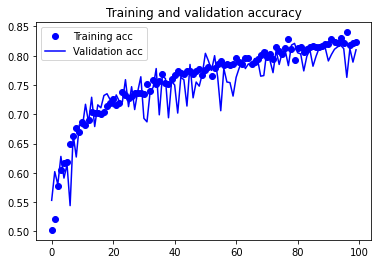

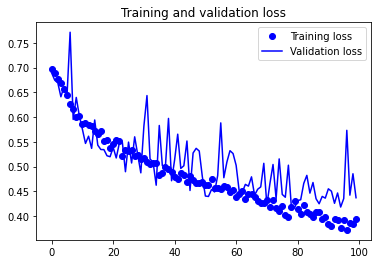

In [55]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

데이터 증식과 드롭아웃 덕분에 더이상 과대적합되지 않았다.

훈련 곡선이 검증 곡선에 가깝게 따라가고 있다. 

검증 데이터에서 82% 정확도를 달성하였다.

규제하지 않은 모델과 비교했을 때 15% 정도 향상되었다.<br><br>

다른 규제 기법을 더 사용하고 네트워크의 파라미터를 튜닝하면(합성곱 층의 필터 수나 네트워크의 층의 수 등) 86%나 87% 정도까지 더 높은 정확도를 얻을 수도 있다.

하지만 데이터가 적기 때문에 컨브넷을 처음부터 훈련해서 더 높은 정확도를 달성하기는 어렵다. 

이런 상황에서 정확도를 높이기 위한 다음 단계는 사전 훈련된 모델을 사용하는 것이 차선책이다.